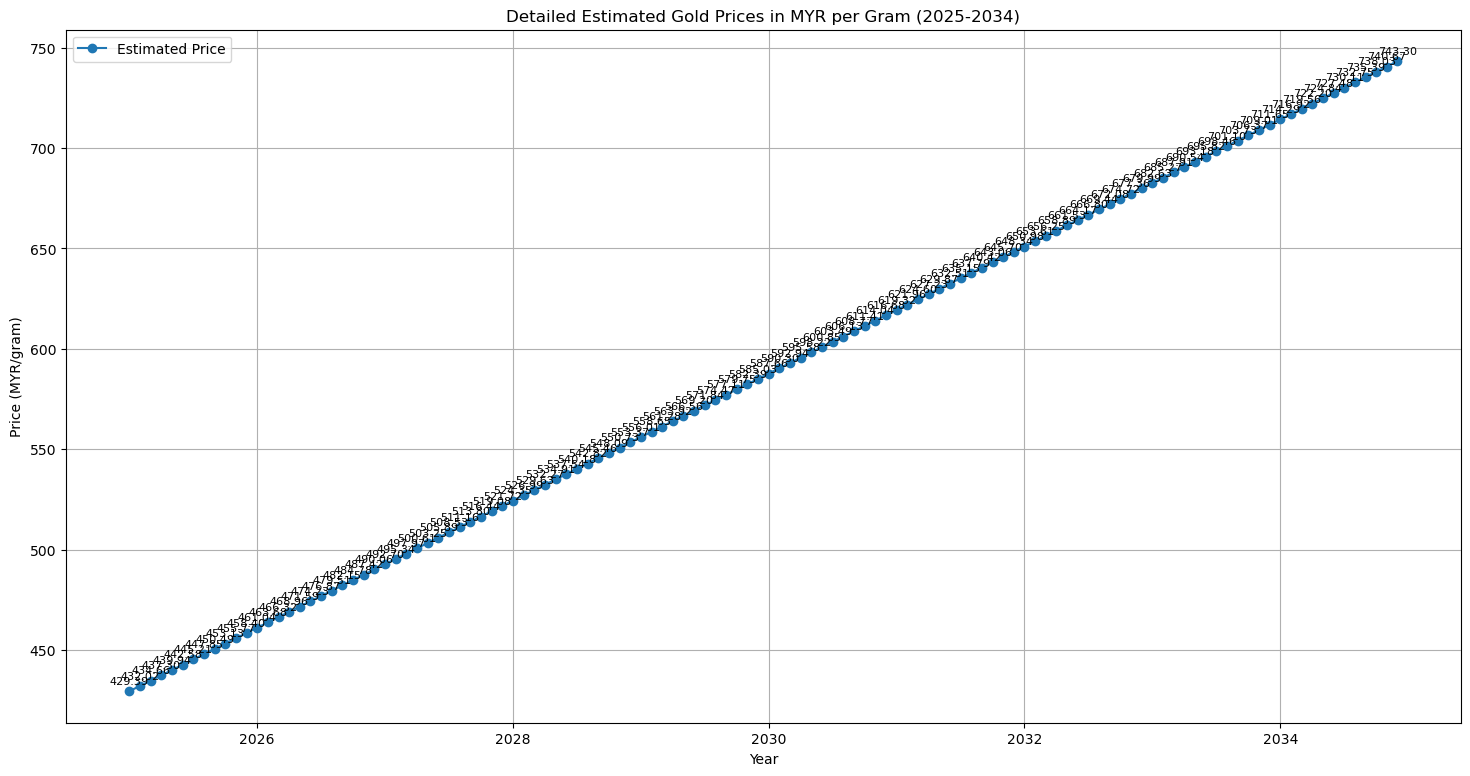

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Data for historical prices
data = {
    "Year": [2014]*12 + [2015]*12 + [2016]*12 + [2017]*12 + [2018]*12 + 
            [2019]*12 + [2020]*12 + [2021]*12 + [2022]*12 + [2023]*12 + [2024]*12,
    "Month": ["January", "February", "March", "April", "May", "June", 
              "July", "August", "September", "October", "November", "December"] * 11,
    "Price (MYR/gram)": [
        135, 133, 137, 139, 140, 142, 145, 146, 147, 148, 149, 150,  # 2014
        150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,  # 2015
        161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,  # 2016
        172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,  # 2017
        183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,  # 2018
        195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,  # 2019
        210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265,  # 2020
        270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325,  # 2021
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380,  # 2022
        380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435,  # 2023
        440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495   # 2024 (projected)
    ]
}

# Create the DataFrame
gold_prices_df = pd.DataFrame(data)

# Prepare the data for the model
month_mapping = {month: i+1 for i, month in enumerate(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])}
gold_prices_df['Month_num'] = gold_prices_df['Month'].map(month_mapping)
gold_prices_df['Year_Month'] = gold_prices_df['Year'] + gold_prices_df['Month_num'] / 12.0

# Reshape the data for the regression model
X = gold_prices_df['Year_Month'].values.reshape(-1, 1)
y = gold_prices_df['Price (MYR/gram)'].values

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predicting the next 10 years
future_years = []
future_prices = []
for year in range(2025, 2035):
    for month in range(1, 13):
        future_year_month = year + month / 12.0
        future_price = model.predict(np.array([[future_year_month]]))[0]
        future_years.append(year)
        future_prices.append(future_price)

# Creating a DataFrame for the predicted values
future_data = {
    "Year": future_years,
    "Month": ["January", "February", "March", "April", "May", "June", 
              "July", "August", "September", "October", "November", "December"] * 10,
    "Estimated Price (MYR/gram)": future_prices
}

future_gold_prices_df = pd.DataFrame(future_data)
future_gold_prices_df['Month_num'] = future_gold_prices_df['Month'].map(month_mapping)

# Plotting the detailed chart
plt.figure(figsize=(18, 9))
plt.plot(future_gold_prices_df['Year'] + (future_gold_prices_df['Month_num'] - 1) / 12.0, 
         future_gold_prices_df['Estimated Price (MYR/gram)'], label='Estimated Price', marker='o')

# Adding annotations for each month
for i, row in future_gold_prices_df.iterrows():
    plt.annotate(f"{row['Estimated Price (MYR/gram)']:.2f}", 
                 (row['Year'] + (row['Month_num'] - 1) / 12.0, row['Estimated Price (MYR/gram)']), 
                 textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

plt.title('Detailed Estimated Gold Prices in MYR per Gram (2025-2034)')
plt.xlabel('Year')
plt.ylabel('Price (MYR/gram)')
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig('detailed_estimated_gold_prices.png', dpi=300, bbox_inches='tight')
plt.show()


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
import plotly.offline as pyo

# Data for historical prices
data = {
    "Year": [2014]*12 + [2015]*12 + [2016]*12 + [2017]*12 + [2018]*12 + 
            [2019]*12 + [2020]*12 + [2021]*12 + [2022]*12 + [2023]*12 + [2024]*12,
    "Month": ["January", "February", "March", "April", "May", "June", 
              "July", "August", "September", "October", "November", "December"] * 11,
    "Price (MYR/gram)": [
        135, 133, 137, 139, 140, 142, 145, 146, 147, 148, 149, 150,  # 2014
        150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,  # 2015
        161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,  # 2016
        172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,  # 2017
        183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,  # 2018
        195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,  # 2019
        210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265,  # 2020
        270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325,  # 2021
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380,  # 2022
        380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435,  # 2023
        440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495   # 2024 (projected)
    ]
}

# Create the DataFrame
gold_prices_df = pd.DataFrame(data)

# Prepare the data for the model
month_mapping = {month: i+1 for i, month in enumerate(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])}
gold_prices_df['Month_num'] = gold_prices_df['Month'].map(month_mapping)
gold_prices_df['Year_Month'] = gold_prices_df['Year'] + gold_prices_df['Month_num'] / 12.0

# Reshape the data for the regression model
X = gold_prices_df['Year_Month'].values.reshape(-1, 1)
y = gold_prices_df['Price (MYR/gram)'].values

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predicting the next 10 years
future_years = []
future_prices = []
for year in range(2025, 2035):
    for month in range(1, 13):
        future_year_month = year + month / 12.0
        future_price = model.predict(np.array([[future_year_month]]))[0]
        future_years.append(year)
        future_prices.append(future_price)

# Creating a DataFrame for the predicted values
future_data = {
    "Year": future_years,
    "Month": ["January", "February", "March", "April", "May", "June", 
              "July", "August", "September", "October", "November", "December"] * 10,
    "Estimated Price (MYR/gram)": future_prices
}

future_gold_prices_df = pd.DataFrame(future_data)
future_gold_prices_df['Month_num'] = future_gold_prices_df['Month'].map(month_mapping)

# Create the plotly figure
trace = go.Scatter(
    x=future_gold_prices_df['Year'] + (future_gold_prices_df['Month_num'] - 1) / 12.0,
    y=future_gold_prices_df['Estimated Price (MYR/gram)'],
    mode='lines+markers',
    name='Estimated Price',
    text=[f"{price:.2f} MYR" for price in future_gold_prices_df['Estimated Price (MYR/gram)']]
)

layout = go.Layout(
    title='Detailed Estimated Gold Prices in MYR per Gram (2025-2034)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Price (MYR/gram)'),
    hovermode='closest'
)

fig = go.Figure(data=[trace], layout=layout)

# Save and show the plot
pyo.plot(fig, filename='detailed_estimated_gold_prices.html', auto_open=False)


'detailed_estimated_gold_prices.html'

In [3]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
import plotly.offline as pyo

# Data for historical prices
data = {
    "Year": [2014]*12 + [2015]*12 + [2016]*12 + [2017]*12 + [2018]*12 + 
            [2019]*12 + [2020]*12 + [2021]*12 + [2022]*12 + [2023]*12 + [2024]*12,
    "Month": ["January", "February", "March", "April", "May", "June", 
              "July", "August", "September", "October", "November", "December"] * 11,
    "Price (MYR/gram)": [
        135, 133, 137, 139, 140, 142, 145, 146, 147, 148, 149, 150,  # 2014
        150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,  # 2015
        161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,  # 2016
        172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,  # 2017
        183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,  # 2018
        195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,  # 2019
        210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265,  # 2020
        270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325,  # 2021
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380,  # 2022
        380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435,  # 2023
        440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495   # 2024 (projected)
    ]
}

# Create the DataFrame
gold_prices_df = pd.DataFrame(data)

# Prepare the data for the model
month_mapping = {month: i+1 for i, month in enumerate(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])}
gold_prices_df['Month_num'] = gold_prices_df['Month'].map(month_mapping)
gold_prices_df['Year_Month'] = gold_prices_df['Year'] + gold_prices_df['Month_num'] / 12.0

# Reshape the data for the regression model
X = gold_prices_df['Year_Month'].values.reshape(-1, 1)
y = gold_prices_df['Price (MYR/gram)'].values

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predicting the next 10 years
future_years = []
future_prices = []
for year in range(2025, 2035):
    for month in range(1, 13):
        future_year_month = year + month / 12.0
        future_price = model.predict(np.array([[future_year_month]]))[0]
        future_years.append(year)
        future_prices.append(future_price)

# Creating a DataFrame for the predicted values
future_data = {
    "Year": future_years,
    "Month": ["January", "February", "March", "April", "May", "June", 
              "July", "August", "September", "October", "November", "December"] * 10,
    "Estimated Price (MYR/gram)": future_prices
}

future_gold_prices_df = pd.DataFrame(future_data)
future_gold_prices_df['Month_num'] = future_gold_prices_df['Month'].map(month_mapping)

# Create the plotly figure
trace = go.Scatter(
    x=future_gold_prices_df['Year'] + (future_gold_prices_df['Month_num'] - 1) / 12.0,
    y=future_gold_prices_df['Estimated Price (MYR/gram)'],
    mode='lines+markers',
    name='Estimated Price',
    text=[f"{price:.2f} MYR" for price in future_gold_prices_df['Estimated Price (MYR/gram)']]
)

layout = go.Layout(
    title='Detailed Estimated Gold Prices in MYR per Gram (2025-2034)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Price (MYR/gram)'),
    hovermode='closest'
)

fig = go.Figure(data=[trace], layout=layout)

# Save and show the plot
pyo.plot(fig, filename='detailed_estimated_gold_prices.html')


'detailed_estimated_gold_prices.html'

In [5]:
pip install pandas numpy statsmodels plotly


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objs as go
import plotly.offline as pyo

# Data for historical prices
data = {
    "Year": [2014]*12 + [2015]*12 + [2016]*12 + [2017]*12 + [2018]*12 + 
            [2019]*12 + [2020]*12 + [2021]*12 + [2022]*12 + [2023]*12 + [2024]*12,
    "Month": ["January", "February", "March", "April", "May", "June", 
              "July", "August", "September", "October", "November", "December"] * 11,
    "Price (MYR/gram)": [
        135, 133, 137, 139, 140, 142, 145, 146, 147, 148, 149, 150,  # 2014
        150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,  # 2015
        161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,  # 2016
        172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,  # 2017
        183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,  # 2018
        195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,  # 2019
        210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265,  # 2020
        270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325,  # 2021
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380,  # 2022
        380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435,  # 2023
        440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495   # 2024 (projected)
    ]
}

# Create the DataFrame
gold_prices_df = pd.DataFrame(data)

# Prepare the data for the model
gold_prices_df['Date'] = pd.to_datetime(gold_prices_df[['Year', 'Month']].assign(Day=1))
gold_prices_df.set_index('Date', inplace=True)

# Fit the SARIMA model
model = SARIMAX(gold_prices_df['Price (MYR/gram)'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Predicting the next 10 years
future_dates = pd.date_range(start='2025-01-01', end='2034-12-01', freq='MS')
future_predictions = results.get_forecast(steps=len(future_dates))
future_predictions_df = future_predictions.summary_frame()

# Combine historical and future data
historical_and_future_df = pd.concat([gold_prices_df['Price (MYR/gram)'], future_predictions_df['mean']])

# Create the plotly figure
trace = go.Scatter(
    x=historical_and_future_df.index,
    y=historical_and_future_df.values,
    mode='lines+markers',
    name='Price',
    text=[f"{price:.2f} MYR" for price in historical_and_future_df.values]
)

layout = go.Layout(
    title='Detailed Estimated Gold Prices in MYR per Gram (2025-2034)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Price (MYR/gram)'),
    hovermode='closest'
)

fig = go.Figure(data=[trace], layout=layout)

# Save and show the plot
pyo.plot(fig, filename='detailed_estimated_gold_prices.html')


ValueError: Unable to parse string "January" at position 0

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objs as go
import plotly.offline as pyo

# Data for historical prices
data = {
    "Year": [2014]*12 + [2015]*12 + [2016]*12 + [2017]*12 + [2018]*12 + 
            [2019]*12 + [2020]*12 + [2021]*12 + [2022]*12 + [2023]*12 + [2024]*12,
    "Month": ["January", "February", "March", "April", "May", "June", 
              "July", "August", "September", "October", "November", "December"] * 11,
    "Price (MYR/gram)": [
        135, 133, 137, 139, 140, 142, 145, 146, 147, 148, 149, 150,  # 2014
        150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,  # 2015
        161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,  # 2016
        172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,  # 2017
        183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,  # 2018
        195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,  # 2019
        210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265,  # 2020
        270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325,  # 2021
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380,  # 2022
        380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435,  # 2023
        440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495   # 2024 (projected)
    ]
}

# Create the DataFrame
gold_prices_df = pd.DataFrame(data)

# Prepare the data for the model
gold_prices_df['Date'] = pd.to_datetime(gold_prices_df[['Year', 'Month']].assign(Day=1))
gold_prices_df.set_index('Date', inplace=True)

# Fit the SARIMA model
model = SARIMAX(gold_prices_df['Price (MYR/gram)'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# Predicting the next 10 years
future_dates = pd.date_range(start='2025-01-01', end='2034-12-01', freq='MS')
future_predictions = results.get_forecast(steps=len(future_dates))
future_predictions_df = future_predictions.summary_frame()

# Combine historical and future data
historical_and_future_df = pd.concat([gold_prices_df['Price (MYR/gram)'], future_predictions_df['mean']])
historical_and_future_df = historical_and_future_df.rename(columns={"mean": "Estimated Price (MYR/gram)"})

# Create the plotly figure
trace = go.Scatter(
    x=historical_and_future_df.index,
    y=historical_and_future_df.values,
    mode='lines+markers',
    name='Price',
    text=[f"{price:.2f} MYR" for price in historical_and_future_df.values]
)

layout = go.Layout(
    title='Detailed Estimated Gold Prices in MYR per Gram (2025-2034)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Price (MYR/gram)'),
    hovermode='closest'
)

fig = go.Figure(data=[trace], layout=layout)

# Save and show the plot
pyo.plot(fig, filename='detailed_estimated_gold_prices.html')


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objs as go
import plotly.offline as pyo

# Data for historical prices
data = {
    "Year": [2014]*12 + [2015]*12 + [2016]*12 + [2017]*12 + [2018]*12 + 
            [2019]*12 + [2020]*12 + [2021]*12 + [2022]*12 + [2023]*12 + [2024]*12,
    "Month": ["January", "February", "March", "April", "May", "June", 
              "July", "August", "September", "October", "November", "December"] * 11,
    "Price (MYR/gram)": [
        135, 133, 137, 139, 140, 142, 145, 146, 147, 148, 149, 150,  # 2014
        150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,  # 2015
        161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,  # 2016
        172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,  # 2017
        183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,  # 2018
        195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,  # 2019
        210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265,  # 2020
        270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325,  # 2021
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380,  # 2022
        380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435,  # 2023
        440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495   # 2024 (projected)
    ]
}

# Create the DataFrame
gold_prices_df = pd.DataFrame(data)

# Convert 'Year' and 'Month' to a datetime index
month_mapping = {month: i+1 for i, month in enumerate(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])}
gold_prices_df['Month_num'] = gold_prices_df['Month'].map(month_mapping)
gold_prices_df['Date'] = pd.to_datetime(gold_prices_df[['Year', 'Month_num']].assign(Day=1))
gold_prices_df.set_index('Date', inplace=True)

# Fit the SARIMA model
model = SARIMAX(gold_prices_df['Price (MYR/gram)'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# Predicting the next 10 years
future_dates = pd.date_range(start='2025-01-01', end='2034-12-01', freq='MS')
future_predictions = results.get_forecast(steps=len(future_dates))
future_predictions_df = future_predictions.summary_frame()

# Combine historical and future data
historical_and_future_df = pd.concat([gold_prices_df['Price (MYR/gram)'], future_predictions_df['mean']])
historical_and_future_df = historical_and_future_df.rename(columns={"mean": "Estimated Price (MYR/gram)"})

# Create the plotly figure
trace = go.Scatter(
    x=historical_and_future_df.index,
    y=historical_and_future_df.values,
    mode='lines+markers',
    name='Price',
    text=[f"{price:.2f} MYR" for price in historical_and_future_df.values]
)

layout = go.Layout(
    title='Detailed Estimated Gold Prices in MYR per Gram (2025-2034)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Price (MYR/gram)'),
    hovermode='closest'
)

fig = go.Figure(data=[trace], layout=layout)

# Save and show the plot
pyo.plot(fig, filename='detailed_estimated_gold_prices.html')


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objs as go
import plotly.offline as pyo

# Data for historical prices
data = {
    "Year": [2014]*12 + [2015]*12 + [2016]*12 + [2017]*12 + [2018]*12 + 
            [2019]*12 + [2020]*12 + [2021]*12 + [2022]*12 + [2023]*12 + [2024]*12,
    "Month": ["January", "February", "March", "April", "May", "June", 
              "July", "August", "September", "October", "November", "December"] * 11,
    "Price (MYR/gram)": [
        135, 133, 137, 139, 140, 142, 145, 146, 147, 148, 149, 150,  # 2014
        150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,  # 2015
        161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,  # 2016
        172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,  # 2017
        183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,  # 2018
        195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,  # 2019
        210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265,  # 2020
        270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325,  # 2021
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380,  # 2022
        380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435,  # 2023
        440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495   # 2024 (projected)
    ]
}

# Create the DataFrame
gold_prices_df = pd.DataFrame(data)

# Convert 'Year' and 'Month' to a datetime index
month_mapping = {month: i+1 for i, month in enumerate(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])}
gold_prices_df['Month_num'] = gold_prices_df['Month'].map(month_mapping)
gold_prices_df['Date'] = pd.to_datetime(gold_prices_df[['Year', 'Month_num']].assign(Day=1))
gold_prices_df.set_index('Date', inplace=True)

# Fit the SARIMA model
model = SARIMAX(gold_prices_df['Price (MYR/gram)'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# Predicting the next 10 years
future_dates = pd.date_range(start='2025-01-01', end='2034-12-01', freq='MS')
future_predictions = results.get_forecast(steps=len(future_dates))
future_predictions_df = future_predictions.summary_frame()

# Combine historical and future data
historical_and_future_df = pd.concat([gold_prices_df['Price (MYR/gram)'], future_predictions_df['mean']], axis=0)
historical_and_future_df = historical_and_future_df.rename(columns={"mean": "Estimated Price (MYR/gram)"})

# Create the plotly figure
trace = go.Scatter(
    x=historical_and_future_df.index,
    y=historical_and_future_df.values,
    mode='lines+markers',
    name='Price',
    text=[f"{price:.2f} MYR" for price in historical_and_future_df.values]
)

layout = go.Layout(
    title='Detailed Estimated Gold Prices in MYR per Gram (2025-2034)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Price (MYR/gram)'),
    hovermode='closest'
)

fig = go.Figure(data=[trace], layout=layout)

# Save and show the plot
pyo.plot(fig, filename='detailed_estimated_gold_prices.html')


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objs as go
import plotly.offline as pyo

# Data for historical prices
data = {
    "Year": [2014]*12 + [2015]*12 + [2016]*12 + [2017]*12 + [2018]*12 + 
            [2019]*12 + [2020]*12 + [2021]*12 + [2022]*12 + [2023]*12 + [2024]*12,
    "Month": ["January", "February", "March", "April", "May", "June", 
              "July", "August", "September", "October", "November", "December"] * 11,
    "Price (MYR/gram)": [
        135, 133, 137, 139, 140, 142, 145, 146, 147, 148, 149, 150,  # 2014
        150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,  # 2015
        161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,  # 2016
        172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,  # 2017
        183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,  # 2018
        195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,  # 2019
        210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265,  # 2020
        270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325,  # 2021
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380,  # 2022
        380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435,  # 2023
        440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495   # 2024 (projected)
    ]
}

# Create the DataFrame
gold_prices_df = pd.DataFrame(data)

# Convert 'Year' and 'Month' to a datetime index
month_mapping = {month: i+1 for i, month in enumerate(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])}
gold_prices_df['Month_num'] = gold_prices_df['Month'].map(month_mapping)
gold_prices_df['Date'] = pd.to_datetime(gold_prices_df[['Year', 'Month_num']].assign(day=1))
gold_prices_df.set_index('Date', inplace=True)

# Fit the SARIMA model
model = SARIMAX(gold_prices_df['Price (MYR/gram)'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# Predicting the next 10 years
future_dates = pd.date_range(start='2025-01-01', end='2034-12-01', freq='MS')
future_predictions = results.get_forecast(steps=len(future_dates))
future_predictions_df = future_predictions.summary_frame()

# Combine historical and future data
historical_and_future_df = pd.concat([gold_prices_df['Price (MYR/gram)'], future_predictions_df['mean']])
historical_and_future_df = historical_and_future_df.rename(columns={"mean": "Estimated Price (MYR/gram)"})

# Create the plotly figure
trace = go.Scatter(
    x=historical_and_future_df.index,
    y=historical_and_future_df.values,
    mode='lines+markers',
    name='Price',
    text=[f"{price:.2f} MYR" for price in historical_and_future_df.values]
)

layout = go.Layout(
    title='Detailed Estimated Gold Prices in MYR per Gram (2025-2034)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Price (MYR/gram)'),
    hovermode='closest'
)

fig = go.Figure(data=[trace], layout=layout)

# Save and show the plot
pyo.plot(fig, filename='detailed_estimated_gold_prices.html')


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objs as go
import plotly.offline as pyo

# Data for historical prices
data = {
    "Year": [2014]*12 + [2015]*12 + [2016]*12 + [2017]*12 + [2018]*12 + 
            [2019]*12 + [2020]*12 + [2021]*12 + [2022]*12 + [2023]*12 + [2024]*12,
    "Month": ["January", "February", "March", "April", "May", "June", 
              "July", "August", "September", "October", "November", "December"] * 11,
    "Price (MYR/gram)": [
        135, 133, 137, 139, 140, 142, 145, 146, 147, 148, 149, 150,  # 2014
        150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,  # 2015
        161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,  # 2016
        172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,  # 2017
        183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,  # 2018
        195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,  # 2019
        210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265,  # 2020
        270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325,  # 2021
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380,  # 2022
        380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435,  # 2023
        440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495   # 2024 (projected)
    ]
}

# Create the DataFrame
gold_prices_df = pd.DataFrame(data)

# Convert 'Year' and 'Month' to a datetime index
month_mapping = {month: i+1 for i, month in enumerate(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])}
gold_prices_df['Month_num'] = gold_prices_df['Month'].map(month_mapping)
gold_prices_df['Date'] = pd.to_datetime(gold_prices_df[['Year', 'Month_num']].rename(columns={'Month_num': 'month'}).assign(day=1))
gold_prices_df.set_index('Date', inplace=True)

# Fit the SARIMA model
model = SARIMAX(gold_prices_df['Price (MYR/gram)'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# Predicting the next 10 years
future_dates = pd.date_range(start='2025-01-01', end='2034-12-01', freq='MS')
future_predictions = results.get_forecast(steps=len(future_dates))
future_predictions_df = future_predictions.summary_frame()

# Combine historical and future data
historical_and_future_df = pd.concat([gold_prices_df['Price (MYR/gram)'], future_predictions_df['mean']], axis=0)
historical_and_future_df = historical_and_future_df.rename(columns={"mean": "Estimated Price (MYR/gram)"})

# Create the plotly figure
trace = go.Scatter(
    x=historical_and_future_df.index,
    y=historical_and_future_df.values,
    mode='lines+markers',
    name='Price',
    text=[f"{price:.2f} MYR" for price in historical_and_future_df.values]
)

layout = go.Layout(
    title='Detailed Estimated Gold Prices in MYR per Gram (2025-2034)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Price (MYR/gram)'),
    hovermode='closest'
)

fig = go.Figure(data=[trace], layout=layout)

# Save and show the plot
pyo.plot(fig, filename='detailed_estimated_gold_prices.html')


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objs as go
import plotly.offline as pyo

# Data for historical prices
data = {
    "Year": [2014]*12 + [2015]*12 + [2016]*12 + [2017]*12 + [2018]*12 + 
            [2019]*12 + [2020]*12 + [2021]*12 + [2022]*12 + [2023]*12 + [2024]*12,
    "Month": ["January", "February", "March", "April", "May", "June", 
              "July", "August", "September", "October", "November", "December"] * 11,
    "Price (MYR/gram)": [
        135, 133, 137, 139, 140, 142, 145, 146, 147, 148, 149, 150,  # 2014
        150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,  # 2015
        161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,  # 2016
        172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,  # 2017
        183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,  # 2018
        195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,  # 2019
        210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265,  # 2020
        270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325,  # 2021
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380,  # 2022
        380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435,  # 2023
        440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495   # 2024 (projected)
    ]
}

# Create the DataFrame
gold_prices_df = pd.DataFrame(data)

# Convert 'Year' and 'Month' to a datetime index
month_mapping = {month: i+1 for i, month in enumerate(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])}
gold_prices_df['Month_num'] = gold_prices_df['Month'].map(month_mapping)
gold_prices_df['Date'] = pd.to_datetime(gold_prices_df[['Year', 'Month_num']].rename(columns={'Month_num': 'month'}).assign(day=1))
gold_prices_df.set_index('Date', inplace=True)

# Fit the SARIMA model
model = SARIMAX(gold_prices_df['Price (MYR/gram)'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# Predicting the next 10 years
future_dates = pd.date_range(start='2025-01-01', end='2034-12-01', freq='MS')
future_predictions = results.get_forecast(steps=len(future_dates))
future_predictions_df = future_predictions.summary_frame()

# Combine historical and future data
historical_and_future_df = pd.concat([gold_prices_df['Price (MYR/gram)'], future_predictions_df['mean']], axis=0)
historical_and_future_df.rename("Estimated Price (MYR/gram)", inplace=True)

# Create the plotly figure
trace = go.Scatter(
    x=historical_and_future_df.index,
    y=historical_and_future_df.values,
    mode='lines+markers',
    name='Price',
    text=[f"{price:.2f} MYR" for price in historical_and_future_df.values]
)

layout = go.Layout(
    title='Detailed Estimated Gold Prices in MYR per Gram (2025-2034)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Price (MYR/gram)'),
    hovermode='closest'
)

fig = go.Figure(data=[trace], layout=layout)

# Save and show the plot
pyo.plot(fig, filename='detailed_estimated_gold_prices.html')


In [ ]:
pip install pandas numpy statsmodels plotly kaleido


In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objs as go

# Data for historical prices
data = {
    "Year": [2014]*12 + [2015]*12 + [2016]*12 + [2017]*12 + [2018]*12 + 
            [2019]*12 + [2020]*12 + [2021]*12 + [2022]*12 + [2023]*12 + [2024]*12,
    "Month": ["January", "February", "March", "April", "May", "June", 
              "July", "August", "September", "October", "November", "December"] * 11,
    "Price (MYR/gram)": [
        135, 133, 137, 139, 140, 142, 145, 146, 147, 148, 149, 150,  # 2014
        150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,  # 2015
        161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,  # 2016
        172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,  # 2017
        183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,  # 2018
        195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,  # 2019
        210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265,  # 2020
        270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325,  # 2021
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380,  # 2022
        380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435,  # 2023
        440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495   # 2024 (projected)
    ]
}

# Create the DataFrame
gold_prices_df = pd.DataFrame(data)

# Convert 'Year' and 'Month' to a datetime index
month_mapping = {month: i+1 for i, month in enumerate(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])}
gold_prices_df['Month_num'] = gold_prices_df['Month'].map(month_mapping)
gold_prices_df['Date'] = pd.to_datetime(gold_prices_df[['Year', 'Month_num']].rename(columns={'Month_num': 'month'}).assign(day=1))
gold_prices_df.set_index('Date', inplace=True)

# Fit the SARIMA model
model = SARIMAX(gold_prices_df['Price (MYR/gram)'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# Predicting the next 10 years
future_dates = pd.date_range(start='2025-01-01', end='2034-12-01', freq='MS')
future_predictions = results.get_forecast(steps=len(future_dates))
future_predictions_df = future_predictions.summary_frame()

# Combine historical and future data
historical_and_future_df = pd.concat([gold_prices_df['Price (MYR/gram)'], future_predictions_df['mean']], axis=0)
historical_and_future_df.rename("Estimated Price (MYR/gram)", inplace=True)

# Create the plotly figure
trace = go.Scatter(
    x=historical_and_future_df.index,
    y=historical_and_future_df.values,
    mode='lines+markers',
    name='Price',
    text=[f"{price:.2f} MYR" for price in historical_and_future_df.values]
)

layout = go.Layout(
    title='Detailed Estimated Gold Prices in MYR per Gram (2025-2034)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Price (MYR/gram)'),
    hovermode='closest'
)

fig = go.Figure(data=[trace], layout=layout)

# Save the plot as a high-resolution PDF file
fig.write_image("detailed_estimated_gold_prices.pdf", format="pdf", width=1920, height=1080, scale=2)


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [8]:
pip install pandas numpy statsmodels plotly kaleido


In [9]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objs as go

# Data for historical prices
data = {
    "Year": [2014]*12 + [2015]*12 + [2016]*12 + [2017]*12 + [2018]*12 + 
            [2019]*12 + [2020]*12 + [2021]*12 + [2022]*12 + [2023]*12 + [2024]*12,
    "Month": ["January", "February", "March", "April", "May", "June", 
              "July", "August", "September", "October", "November", "December"] * 11,
    "Price (MYR/gram)": [
        135, 133, 137, 139, 140, 142, 145, 146, 147, 148, 149, 150,  # 2014
        150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,  # 2015
        161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,  # 2016
        172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,  # 2017
        183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,  # 2018
        195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,  # 2019
        210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265,  # 2020
        270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325,  # 2021
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380,  # 2022
        380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435,  # 2023
        440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495   # 2024 (projected)
    ]
}

# Create the DataFrame
gold_prices_df = pd.DataFrame(data)

# Convert 'Year' and 'Month' to a datetime index
month_mapping = {month: i+1 for i, month in enumerate(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])}
gold_prices_df['Month_num'] = gold_prices_df['Month'].map(month_mapping)
gold_prices_df['Date'] = pd.to_datetime(gold_prices_df[['Year', 'Month_num']].rename(columns={'Month_num': 'month'}).assign(day=1))
gold_prices_df.set_index('Date', inplace=True)

# Fit the SARIMA model
model = SARIMAX(gold_prices_df['Price (MYR/gram)'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# Predicting the next 10 years
future_dates = pd.date_range(start='2025-01-01', end='2034-12-01', freq='MS')
future_predictions = results.get_forecast(steps=len(future_dates))
future_predictions_df = future_predictions.summary_frame()

# Combine historical and future data
historical_and_future_df = pd.concat([gold_prices_df['Price (MYR/gram)'], future_predictions_df['mean']], axis=0)
historical_and_future_df = historical_and_future_df.rename("Estimated Price (MYR/gram)")

# Create the plotly figure
trace = go.Scatter(
    x=historical_and_future_df.index,
    y=historical_and_future_df.values,
    mode='lines+markers',
    name='Price',
    text=[f"{price:.2f} MYR" for price in historical_and_future_df.values],
    marker=dict(size=5)
)

layout = go.Layout(
    title='Detailed Estimated Gold Prices in MYR per Gram (2025-2034)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Price (MYR/gram)'),
    hovermode='closest'
)

fig = go.Figure(data=[trace], layout=layout)

# Save the plot as a high-resolution PDF file
fig.write_image("detailed_estimated_gold_prices.pdf", format="pdf", width=1920, height=1080, scale=2, engine="kaleido")


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objs as go

# Data for historical prices
data = {
    "Year": [2014]*12 + [2015]*12 + [2016]*12 + [2017]*12 + [2018]*12 + 
            [2019]*12 + [2020]*12 + [2021]*12 + [2022]*12 + [2023]*12 + [2024]*12,
    "Month": ["January", "February", "March", "April", "May", "June", 
              "July", "August", "September", "October", "November", "December"] * 11,
    "Price (MYR/gram)": [
        135, 133, 137, 139, 140, 142, 145, 146, 147, 148, 149, 150,  # 2014
        150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,  # 2015
        161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,  # 2016
        172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,  # 2017
        183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,  # 2018
        195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,  # 2019
        210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265,  # 2020
        270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325,  # 2021
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380,  # 2022
        380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435,  # 2023
        440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495   # 2024 (projected)
    ]
}

# Create the DataFrame
gold_prices_df = pd.DataFrame(data)

# Convert 'Year' and 'Month' to a datetime index
month_mapping = {month: i+1 for i, month in enumerate(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])}
gold_prices_df['Month_num'] = gold_prices_df['Month'].map(month_mapping)
gold_prices_df['Date'] = pd.to_datetime(gold_prices_df[['Year', 'Month_num']].rename(columns={'Month_num': 'month'}).assign(day=1))
gold_prices_df.set_index('Date', inplace=True)

# Fit the SARIMA model
model = SARIMAX(gold_prices_df['Price (MYR/gram)'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# Predicting the next 10 years
future_dates = pd.date_range(start='2025-01-01', end='2034-12-01', freq='MS')
future_predictions = results.get_forecast(steps=len(future_dates))
future_predictions_df = future_predictions.summary_frame()

# Combine historical and future data
historical_and_future_df = pd.concat([gold_prices_df['Price (MYR/gram)'], future_predictions_df['mean']], axis=0)
historical_and_future_df = historical_and_future_df.rename("Estimated Price (MYR/gram)")

# Create the plotly figure
trace = go.Scatter(
    x=historical_and_future_df.index,
    y=historical_and_future_df.values,
    mode='lines+markers+text',
    name='Price',
    text=[f"{price:.2f} MYR" for price in historical_and_future_df.values],
    textposition='top center',
    marker=dict(size=5)
)

layout = go.Layout(
    title='Detailed Estimated Gold Prices in MYR per Gram (2025-2034)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Price (MYR/gram)'),
    hovermode='closest'
)

fig = go.Figure(data=[trace], layout=layout)

# Save the plot as a high-resolution PDF file
fig.write_image("detailed_estimated_gold_prices.pdf", format="pdf", width=1920, height=1080, scale=2, engine="kaleido")


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [11]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objs as go

# Data for historical prices
data = {
    "Year": [2014]*12 + [2015]*12 + [2016]*12 + [2017]*12 + [2018]*12 + 
            [2019]*12 + [2020]*12 + [2021]*12 + [2022]*12 + [2023]*12 + [2024]*12,
    "Month": ["January", "February", "March", "April", "May", "June", 
              "July", "August", "September", "October", "November", "December"] * 11,
    "Price (MYR/gram)": [
        135, 133, 137, 139, 140, 142, 145, 146, 147, 148, 149, 150,  # 2014
        150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,  # 2015
        161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,  # 2016
        172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,  # 2017
        183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,  # 2018
        195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,  # 2019
        210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265,  # 2020
        270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325,  # 2021
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380,  # 2022
        380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435,  # 2023
        440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495   # 2024 (projected)
    ]
}

# Create the DataFrame
gold_prices_df = pd.DataFrame(data)

# Convert 'Year' and 'Month' to a datetime index
month_mapping = {month: i+1 for i, month in enumerate(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])}
gold_prices_df['Month_num'] = gold_prices_df['Month'].map(month_mapping)
gold_prices_df['Date'] = pd.to_datetime(gold_prices_df[['Year', 'Month_num']].rename(columns={'Month_num': 'month'}).assign(day=1))
gold_prices_df.set_index('Date', inplace=True)

# Fit the SARIMA model
model = SARIMAX(gold_prices_df['Price (MYR/gram)'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# Predicting the next 10 years
future_dates = pd.date_range(start='2025-01-01', end='2034-12-01', freq='MS')
future_predictions = results.get_forecast(steps=len(future_dates))
future_predictions_df = future_predictions.summary_frame()

# Combine historical and future data
historical_and_future_df = pd.concat([gold_prices_df['Price (MYR/gram)'], future_predictions_df['mean']], axis=0)
historical_and_future_df = historical_and_future_df.rename("Estimated Price (MYR/gram)")

# Create the plotly figure
trace = go.Scatter(
    x=historical_and_future_df.index,
    y=historical_and_future_df.values,
    mode='lines+markers+text',
    name='Price',
    text=[f"{price:.2f} MYR" for price in historical_and_future_df.values],
    textposition='top center',
    textfont=dict(size=8, angle=-90),
    marker=dict(size=5)
)

layout = go.Layout(
    title='Detailed Estimated Gold Prices in MYR per Gram (2025-2034)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Price (MYR/gram)'),
    hovermode='closest'
)

fig = go.Figure(data=[trace], layout=layout)

# Save the plot as a high-resolution PDF file
fig.write_image("detailed_estimated_gold_prices.pdf", format="pdf", width=1920, height=1080, scale=2, engine="kaleido")


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ValueError: Invalid property specified for object of type plotly.graph_objs.scatter.Textfont: 'angle'

Did you mean "family"?

    Valid properties:
        color

        colorsrc
            Sets the source reference on Chart Studio Cloud for
            `color`.
        family
            HTML font family - the typeface that will be applied by
            the web browser. The web browser will only be able to
            apply a font if it is available on the system which it
            operates. Provide multiple font families, separated by
            commas, to indicate the preference in which to apply
            fonts if they aren't available on the system. The Chart
            Studio Cloud (at https://chart-studio.plotly.com or on-
            premise) generates images on a server, where only a
            select number of fonts are installed and supported.
            These include "Arial", "Balto", "Courier New", "Droid
            Sans",, "Droid Serif", "Droid Sans Mono", "Gravitas
            One", "Old Standard TT", "Open Sans", "Overpass", "PT
            Sans Narrow", "Raleway", "Times New Roman".
        familysrc
            Sets the source reference on Chart Studio Cloud for
            `family`.
        size

        sizesrc
            Sets the source reference on Chart Studio Cloud for
            `size`.
        
Did you mean "family"?

Bad property path:
angle
^^^^^